# Module 03

## Session 09 Unsupervised Learning

# K-Means

Analyze data 'ilustrasi k means.csv':
* plot the data using scatter plot
* determine the optimal number of cluster
    - elbow method
    - silhouette method
* plot the data and clustering result (optimal number of cluster) using scatter plot

# Library

In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score

import seaborn as sns
import matplotlib.pyplot as plt

# Data

In [6]:
X = pd.read_csv('./datasets/ilustrasi k means.csv', sep=';')
X.head()

,tinggibadan,tinggibadanistri
0,175,175
1,178,178
2,175,166
3,180,179
4,185,181


# Data Visualization

Text(0, 0.5, 'Tinggi Badan Istri')

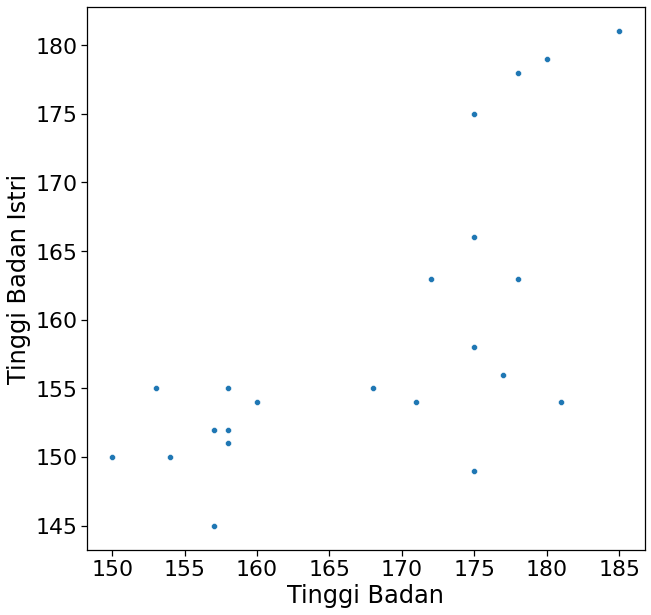

In [14]:
plt.figure(figsize=(10,10))

sns.set_context(context='notebook', font_scale=2)
sns.scatterplot(
    x='tinggibadan', 
    y='tinggibadanistri', 
    data=X
)

plt.xlabel('Tinggi Badan')
plt.ylabel('Tinggi Badan Istri')

# Optimum Number of Cluster

## 1. Elbow Method

In [15]:
def cluster_evaluation(number_of_cluster):
    # clustering variation
    clusterings = [KMeans(n_clusters=k).fit(X) for k in number_of_cluster]
    centroids = [k.cluster_centers_ for k in clusterings]

    # within sumsq
    D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
    cIdx = [np.argmin(D, axis=1) for D in D_k]
    dist = [np.min(D, axis=1) for D in D_k]
    avgWithinSS = [sum(d)/X.shape[0] for d in dist]

    return avgWithinSS

1. withinsq, higher cluster, withinsq lower
2. change of withinsq

In [16]:
number_of_cluster = range(2,11)
avgWithinsq = cluster_evaluation(number_of_cluster)

Text(0, 0.5, 'Within SQ')

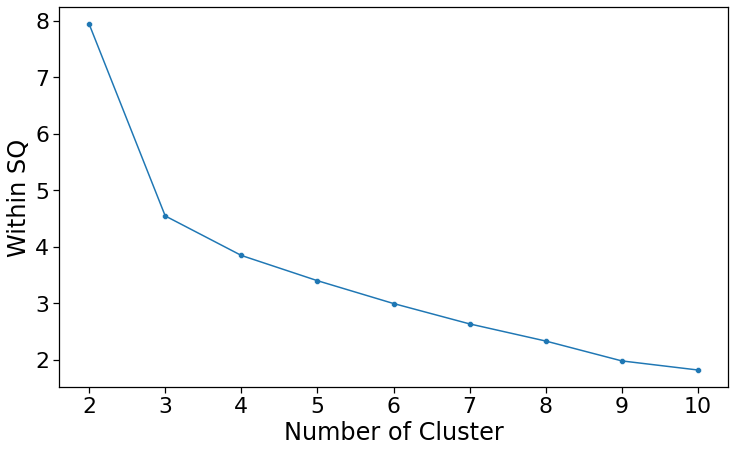

In [21]:
plt.figure(figsize=(12,7))

sns.lineplot(x=number_of_cluster, y=avgWithinsq)
sns.scatterplot(x=number_of_cluster, y=avgWithinsq)

plt.xlabel('Number of Cluster')
plt.ylabel('Within SQ')

## 2. Silhouette Method

In [26]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

In [27]:
label = kmeans.labels_
silhouette_score(X, label, metric='euclidean')

0.5469497456399819

In [28]:
score = []
number_of_cluster = range(2,11)

for i in number_of_cluster:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)

    label = kmeans.labels_
    score.append(silhouette_score(X, label, metric='euclidean'))

Text(0, 0.5, 'Silhouette Score')

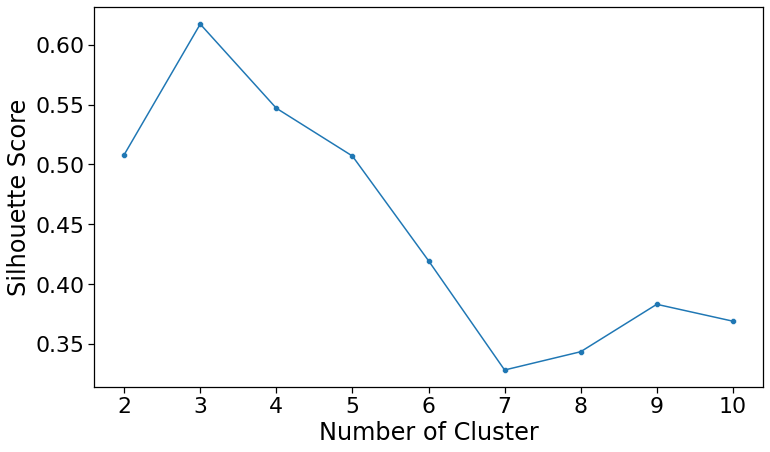

In [29]:
plt.figure(figsize=(12,7))

sns.lineplot(x=number_of_cluster, y=score)
sns.scatterplot(x=number_of_cluster, y=score)

plt.xlabel('Number of Cluster')
plt.ylabel('Silhouette Score')

# Final Result

In [30]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [31]:
X['cluster'] = kmeans.labels_
X.head()

,tinggibadan,tinggibadanistri,cluster
0,175,175,0
1,178,178,0
2,175,166,2
3,180,179,0
4,185,181,0


Text(0, 0.5, 'Tinggi Badan Istri')

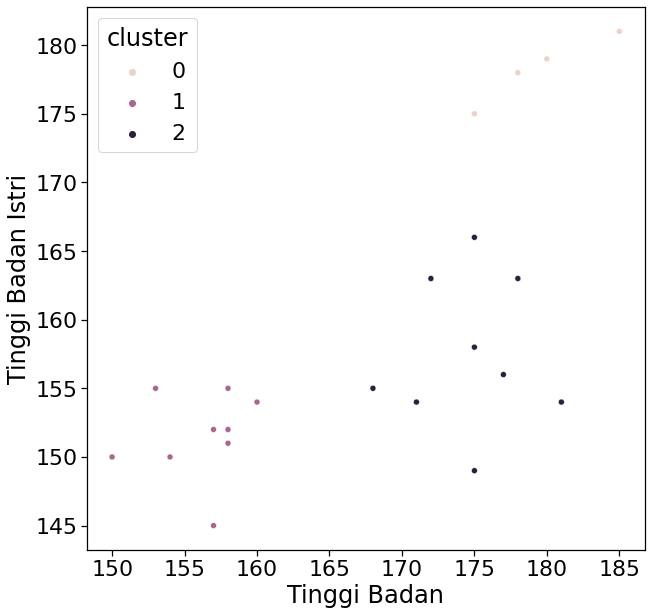

In [33]:
plt.figure(figsize=(10,10))

sns.set_context(context='notebook', font_scale=2)
sns.scatterplot(
    x='tinggibadan', 
    y='tinggibadanistri', 
    data=X,
    hue='cluster'
)

plt.xlabel('Tinggi Badan')
plt.ylabel('Tinggi Badan Istri')